In [1]:
import numpy as np
import re
from IPython.display import display, Math, Latex, Image

In [68]:
train_list = cPickle.load(open('train_final.p','r'))
def checkMapping(idx, train_list):
    import cPickle
    props = np.load('properties.npy').tolist()
    file_name, idx_formula = train_list[idx]
    display(Image(filename='./cropped_images/'+file_name))
    formula = ''.join([props['idx_to_char'][x] for x in idx_formula[1:-1]]).replace('#UNK',' ')
    display(Math(formula))

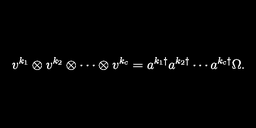

<IPython.core.display.Math object>

In [70]:
checkMapping(9913,train_list)

In [3]:
file_list = open("im2markup/train_filter.lst",'r').readlines()
vocab = open("im2markup/latex_vocab.txt").readlines()
formulae = open("im2markup/formulas.norm.lst",'r').readlines()
char_to_idx = {x.split('\n')[0]:i for i,x in enumerate(vocab)}
# print len(char_to_idx)
char_to_idx['#UNK'] = len(char_to_idx)
char_to_idx['#START'] = len(char_to_idx)
char_to_idx['#END'] = len(char_to_idx)
idx_to_char = {y:x for x,y in char_to_idx.iteritems()}
# print char_to_idx['#UNK']
# print char_to_idx['#START']
# print char_to_idx['#END']
print len(char_to_idx)

502


In [4]:
train = []
missing = {}
for i,line in enumerate(file_list):
    form = formulae[int(line.split()[1])].strip().split()
    out_form = [char_to_idx['#START']]
    for c in form:
        try:
            out_form += [char_to_idx[c]]
        except:
            if c not in missing:
                print c, " not found!"
                missing[c] = 1
            else:
                missing[c] += 1
            out_form += [char_to_idx['#UNK']]
    out_form += [char_to_idx['#END']]
    train.append([line.split()[0],out_form])

20  not found!
\mathaccent  not found!
0.9  not found!
\left/  not found!
\^  not found!
\brack  not found!
\protecte  not found!
1.7  not found!
\bigvee  not found!
\biggm  not found!
\fill  not found!
\verb  not found!
\newcommand  not found!
#  not found!
\protectZ  not found!
2.1  not found!
\rightarrowfill  not found!
\left>  not found!
\right<  not found!
\nearrow  not found!
10  not found!
\protectE  not found!
\mathord  not found!
\protectm  not found!
\triangleleft  not found!
\root  not found!
\of  not found!
\preceq  not found!
\vector  not found!
\overwithdelims  not found!
\left]  not found!
\right[  not found!
\left\lceil  not found!
\right\rceil  not found!
\leavevmode  not found!
\mathstrut  not found!
\symbol  not found!
\footnotemark  not found!
\mathopen  not found!
\mathclose  not found!
\nulldelimiterspace  not found!
\brace  not found!
\searrow  not found!
0.23  not found!
\atopwithdelims  not found!
\right/  not found!


In [5]:
print missing
print max([len(x[1]) for x in train])
import numpy as np
np.save('train_list',np.array(train,dtype=object))

train_buckets = {}
from PIL import Image
for x,y in train:
    img_shp = Image.open('./images_processed/'+x).size
    try:
        img_shp[img_shp] += [(x,y)]
    except:
        img_shp[img_shp] = [(x,y)]

np.save('train_list_buckets',train_buckets)

(500, 100)


In [6]:
properties = {}
properties['vocab_size'] = len(vocab)
properties['vocab'] = vocab
properties['char_to_idx'] = char_to_idx
properties['idx_to_char'] = idx_to_char
import numpy as np
np.save('properties',properties)

In [16]:
displayIdxs = lambda Y: display(Math(''.join(map(lambda x: properties['idx_to_char'][x],Y))))

In [2]:
import numpy as np
imgs = np.load('pred_imgs.npy')
preds = np.load('pred_latex.npy')
properties = np.load('properties.npy').tolist()
displayPreds = lambda Y: display(Math(Y.split('#END')[0]))

In [8]:
i=18
idx_to_chars = lambda Y: ' '.join(map(lambda x: properties['idx_to_char'][x],Y))
preds_chars = idx_to_chars(preds[i,1:]).replace('$','')
displayPreds(preds_chars)
print preds[i]
print preds_chars
%matplotlib inline
from PIL import Image
print imgs[0].shape
Image.fromarray(imgs[i][0]).show()

<IPython.core.display.Math object>

[500 464 205 495 468 497 495 468 464 497 236 462 495 473 497 461 495   4
 475   5  52 497  35 207 462 495 473 497 461 495   4 475   5 497 236 462
 495 473 497 461 495   4 475   5  52 497   7 403 462 495 476 497 466 462
 495 473 485   8 486 497 121 461 495 480 462 495  20 497 497 245 205 495
 121 497 495 196 497 352 461 495 480 462 495  21 497 497 245 121 312 495
 477 480 497   4 205 495 464 497 495 494 462 495 472 497 497   5 352 461
 495 480 462 495  22 497 497 245 205 495 464 497 495 494 462 495 472 497
 497 352 461 495 207 462 495  20 497 461 495  20 497   7 419 495 207 497
 462 495 486 497 497  12 501 501 462 495 472 497 461 495   4  20]
a \frac { d } { d a } \lambda _ { i } ^ { ( j ) N } = \gamma _ { i } ^ { ( j ) } \lambda _ { i } ^ { ( j ) N } + \sum _ { k } c _ { i r , s } \alpha ^ { n _ { 1 } } \left( \frac { \alpha } { \epsilon } \right) ^ { n _ { 2 } } \left( \alpha \operatorname { l n } ( \frac { a } { z _ { h } } ) \right) ^ { n _ { 3 } } \left( \frac { a } { z _ { h } } \

In [2]:
display(Math('T_{\\nu}^{\\mu}=F_{\\mu\\nu}^{a}+\\frac12[f_{a}^{\\mu},x_{\\nu}^{\\mu}]+[(\\tau_{\\mu\\nu}^{I}x^{\\mu})_{a}-2A^{\\mu}(x_{1}-x_{2})\\Delta_{\\nu}],\\quad\\sigma=-T_{1}'))

<IPython.core.display.Math object>